<a href="https://colab.research.google.com/github/Calmegi/matstat/blob/main/lab3/lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math
import random
import statistics
from scipy import stats as sps
from statsmodels.stats.multicomp import pairwise_tukeyhsd     #для оценки различных моделей и проведения тестов с ними(критерий тьюки - для метода множественных сравнений)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

**Задание №1**

In [ ]:
x_1 = sps.norm.rvs(loc=10, scale=2, size=50)
x_2 = sps.norm.rvs(loc=5, scale=2, size=50)
x_3 = sps.norm.rvs(loc=10, scale=5, size=50)
print(x_1[:10])
print()
print(x_2[:10])
print()
print(x_3[:10])

[10.40796754  8.45562953  8.84488557  8.85455427 14.23961237  8.26401342
  9.20006103  9.47664424 11.13956736  6.24657989]

[10.04600895  1.35684884  5.28541913  6.43288847  5.49609262  4.48180364
  3.73837996  6.31287836  5.30791079  1.77857386]

[10.01214902  9.10016146 14.65543568 11.43544755  9.86539171 15.24817468
 15.8644234  -0.33877064  8.82813714  5.10877092]


In [ ]:
print(x_1.mean())
print(x_1.var())
print(x_1.std())

9.714443023899921
4.723387428367179
2.173335553559822


In [ ]:
print(x_2.mean())
print(x_2.var())
print(x_2.std())

4.828114676459174
3.971797523457107
1.9929369090508378


In [ ]:
print(x_3.mean())
print(x_3.var())
print(x_3.std())

11.386237826833872
23.18653468642451
4.8152398368538725


In [ ]:
pooled = np.concatenate([x_1, x_2, x_3])
print(pooled.mean())
print(pooled.var())
print(pooled.std())

8.642931842397653
18.36947119470521
4.28596210840754


**Задание №2**

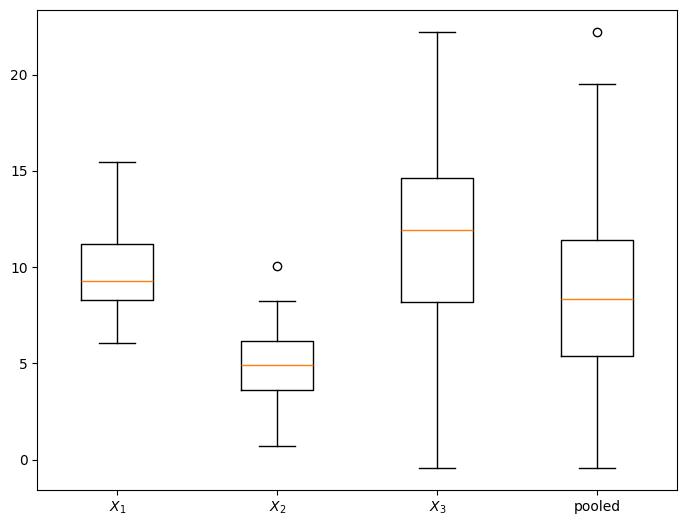

In [ ]:
data = [x_1, x_2, x_3, pooled]
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.boxplot(data)
plt.xticks([1, 2, 3, 4], ["$X_1$", "$X_2$", "$X_3$", "pooled"])
plt.show()

**Задание №3**

In [ ]:
sps.bartlett(x_1, x_2, x_3)

BartlettResult(statistic=49.285264254844634, pvalue=1.9853672219890374e-11)

**Задание №4**

In [ ]:
n = 150
K = 3
n_1 = 50
n_2 = 50
n_3 = 50

In [ ]:
D_w = (n_1 * x_1.var() + n_2 * x_2.var() + n_3 * x_3.var())/n
#within-group variance = внутригрупповая дисперсия
D_w

10.627239879416264

In [ ]:
D_b = (n_1 * (x_1.mean() - pooled.mean()) ** 2 + n_2 * (x_2.mean() - pooled.mean()) ** 2 + n_3 * n_1 * (x_3.mean() - pooled.mean()) ** 2)/n
#between-group variance = межгрупповая дисперсия
D_b

130.66245081126732

In [ ]:
D_x = D_b + D_w
D_x

141.28969069068359

In [ ]:
unb_est_b = n * D_b/(K - 1)
unb_est_b

9799.683810845048

In [ ]:
unb_est_w = n * D_w/(n - K)
unb_est_w

10.844122325934963

In [ ]:
unb_est_x = n * D_x/(n - 1)
unb_est_x

142.23794364833918

In [ ]:
eta_sq = D_b / D_x
eta_sq

0.9247840388957904

In [ ]:
eta = math.sqrt(D_b / D_x)
eta

0.9616569236977345

In [ ]:
sps.f_oneway(x_1, x_2, x_3)

F_onewayResult(statistic=53.54673538290311, pvalue=3.3947003972580522e-18)

**Задание №5**

In [ ]:
df = pd.DataFrame({'X_1': x_1, 'X_2': x_2, 'X_3': x_3}) #по 50 сделать
df

,X_1,X_2,X_3
0,10.407968,10.046009,10.012149
1,8.455630,1.356849,9.100161
2,8.844886,5.285419,14.655436
3,8.854554,6.432888,11.435448
4,14.239612,5.496093,9.865392
5,8.264013,4.481804,15.248175
6,9.200061,3.738380,15.864423
7,9.476644,6.312878,-0.338771
8,11.139567,5.307911,8.828137
9,6.246580,1.778574,5.108771


In [ ]:
data = df.stack().reset_index()
data

,level_0,level_1,0
0,0,X_1,10.407968
1,0,X_2,10.046009
2,0,X_3,10.012149
3,1,X_1,8.455630
4,1,X_2,1.356849
...,...,...,...
145,48,X_2,2.538105
146,48,X_3,17.967775
147,49,X_1,12.631617
148,49,X_2,6.625659


In [ ]:
data = data.rename(columns={"level_0": "id", "level_1": "group", 0: "score"})
data

,id,group,score
0,0,X_1,10.407968
1,0,X_2,10.046009
2,0,X_3,10.012149
3,1,X_1,8.455630
4,1,X_2,1.356849
...,...,...,...
145,48,X_2,2.538105
146,48,X_3,17.967775
147,49,X_1,12.631617
148,49,X_2,6.625659


In [ ]:
tukey_comp = pairwise_tukeyhsd(endog=data["score"], groups=data["group"], alpha=0.05)
print(tukey_comp)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
   X_1    X_2  -4.8863    0.0 -6.4457 -3.3269   True
   X_1    X_3   1.6718 0.0324  0.1124  3.2312   True
   X_2    X_3   6.5581    0.0  4.9987  8.1175   True
----------------------------------------------------


In [ ]:
def linear_contrast_method(x, y, alpha):
  c = x.mean() - y.mean()
  sigma_sq = (n * D_w / (n - K)) * (1 / len(x) + 1/len(y))
  kv_f = sps.f(K - 1, n - K).ppf(1 - alpha)
  lower = c - math.sqrt(sigma_sq * (K - 1) * kv_f)
  upper = c + math.sqrt(sigma_sq * (K - 1) * kv_f)
  return lower, upper

In [ ]:
alpha = 0.05

In [ ]:
a_1, b_1 = linear_contrast_method(x_1, x_2, alpha)
a_1, b_1

(3.25765496403225, 6.515001730849244)

In [ ]:
a_2, b_2 = linear_contrast_method(x_1, x_3, alpha)
a_2, b_2

(-3.3004681863424477, -0.0431214195254539)

In [ ]:
a_3, b_3 = linear_contrast_method(x_2, x_3, alpha)
a_3, b_3

(-8.186796533783195, -4.929449766966201)

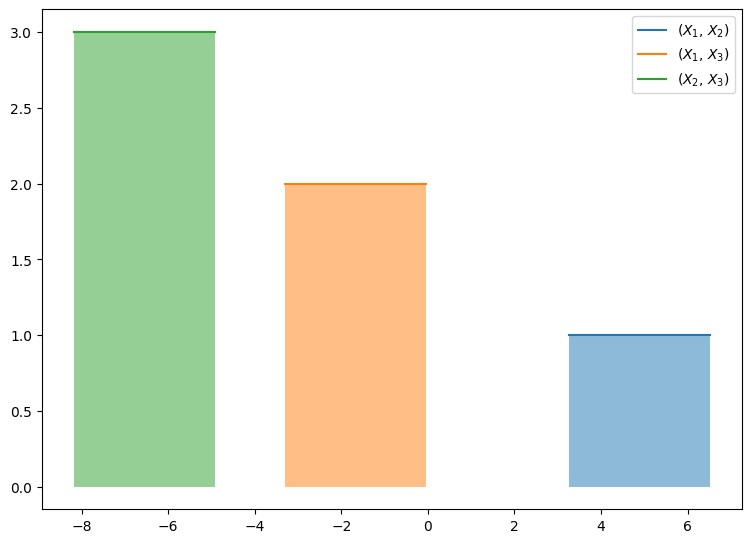

In [ ]:
fig = plt.figure(figsize =(7, 5))
ax = fig.add_axes([0, 0, 1, 1])
#fig, ax = plt.subplots()
ax.plot([a_1, b_1], [1, 1], label="($X_1$, $X_2$)")
ax.plot([a_2, b_2], [2, 2], label="($X_1$, $X_3$)")
ax.plot([a_3, b_3], [3, 3], label="($X_2$, $X_3$)")
ax.fill_between([a_1, b_1], [1, 1], alpha=0.5)
ax.fill_between([a_2, b_2], [2, 2], alpha=0.5)
ax.fill_between([a_3, b_3], [3, 3], alpha=0.5)
plt.legend()
plt.show()